# Lab 5 - Joining Uber Pick-Ups, Stations, and Boroughs

In [Lecture 3.4](./3_4_joining_large_and_small_files.ipynb), we introduced using a Python `dict` to join a large and small table.  In this lab, we will practice this technique on the uber data set.

**Note:** Make sure that you download and unzip the file `Uber-Jan-Feb-FOIL.csv` before proceeding.

In [1]:
import pandas as pd
from dfply import *

In [2]:
c_size = 500000
trips = pd.read_csv("./data/uber/uber-trip-data/uber-raw-data-janjune-15.csv", chunksize=c_size)
first_chunk = next(trips)


In [3]:
first_chunk.shape

(500000, 4)

## <font color="red"> Problem 1 - Creating 2 Location `dict`</font>

Read the file `taxi-zone-lookup.csv` and inspect the columns. What 2 pieces of information will this file allow us to add to the `uber-raw-data-janjune-15.csv`?  Make a `dict` for each of these variables.

> *the taxi-lookup file gives us the additional information of Borough and Zone*

In [4]:
c_size = 500000
taxi_zone = pd.read_csv("./data/uber/uber-trip-data/taxi-zone-lookup.csv", chunksize=c_size)
taxi_zone = next(taxi_zone)
taxi_zone

,LocationID,Borough,Zone
0,1,EWR,Newark Airport
1,2,Queens,Jamaica Bay
2,3,Bronx,Allerton/Pelham Gardens
3,4,Manhattan,Alphabet City
4,5,Staten Island,Arden Heights
5,6,Staten Island,Arrochar/Fort Wadsworth
6,7,Queens,Astoria
7,8,Queens,Astoria Park
8,9,Queens,Auburndale
9,10,Queens,Baisley Park


In [5]:
borr_dict = {loc_id:borr for loc_id, borr in zip(first_chunk.locationID, taxi_zone.Borough)}
borr_dict

{141: 'Brooklyn',
 65: 'Queens',
 100: 'Bronx',
 80: 'Bronx',
 90: 'Manhattan',
 228: 'Manhattan',
 7: 'Manhattan',
 74: 'Manhattan',
 249: 'Queens',
 22: 'Queens',
 263: 'Queens',
 61: 'Queens',
 229: 'Brooklyn',
 164: 'Bronx',
 237: 'Bronx',
 142: 'Bronx',
 188: 'Brooklyn',
 224: 'Queens',
 238: 'Bronx',
 242: 'Brooklyn',
 95: 'Manhattan',
 236: 'Bronx',
 233: 'Manhattan',
 230: 'Manhattan',
 162: 'Bronx',
 234: 'Bronx',
 161: 'Queens',
 87: 'Queens',
 246: 'Manhattan',
 186: 'Brooklyn',
 48: 'Queens',
 158: 'Brooklyn',
 137: 'Manhattan',
 135: 'Queens',
 145: 'Staten Island',
 231: 'Queens',
 125: 'Brooklyn',
 132: 'Manhattan',
 170: 'Manhattan',
 239: 'Queens',
 41: 'Staten Island',
 148: 'Staten Island',
 79: 'Staten Island',
 113: 'Queens',
 68: 'Unknown',
 147: 'Brooklyn',
 255: 'Brooklyn',
 256: 'Queens',
 181: 'Manhattan',
 138: 'Bronx',
 166: 'Brooklyn',
 174: 'Manhattan',
 62: 'Brooklyn',
 75: 'Manhattan',
 143: 'Brooklyn',
 37: 'Staten Island',
 33: 'Brooklyn',
 50: 'Queens

In [6]:
zone_dict = {loc_id:zone for loc_id, zone in zip(first_chunk.locationID, taxi_zone.Zone)}
zone_dict

{141: 'Sunset Park East',
 65: 'Laurelton',
 100: 'Allerton/Pelham Gardens',
 80: 'Van Nest/Morris Park',
 90: 'Randalls Island',
 228: 'Flatiron',
 7: 'Upper West Side South',
 74: 'Yorkville West',
 249: 'Woodhaven',
 22: 'Baisley Park',
 263: 'Rosedale',
 61: 'South Ozone Park',
 229: 'Sheepshead Bay',
 164: 'Country Club',
 237: 'University Heights/Morris Heights',
 142: 'Soundview/Bruckner',
 188: 'Bedford',
 224: 'Bellerose',
 238: 'Van Cortlandt Village',
 242: 'Bensonhurst East',
 95: 'Murray Hill',
 236: 'West Farms/Bronx River',
 233: 'Gramercy',
 230: 'Meatpacking/West Village West',
 162: 'Williamsbridge/Olinville',
 234: 'Norwood',
 161: 'Oakland Gardens',
 87: 'LaGuardia Airport',
 246: 'Lower East Side',
 186: 'Brooklyn Navy Yard',
 48: 'South Jamaica',
 158: 'Bushwick North',
 137: 'TriBeCa/Civic Center',
 135: 'Cambria Heights',
 145: 'Rossville/Woodrow',
 231: 'Whitestone',
 125: 'Midwood',
 132: 'Inwood',
 170: 'Upper West Side North',
 239: 'Willets Point',
 41: 'Oa

## <font color="red"> Problem 2 - Dispatch Translation</font>

The following table was taken from the FiveThirtyEight github page and contains the names of each Uber dispatch station.  Create a translation `dict` for these data.

Base Code | Base Name
---|---------
B02512 | Unter
B02598 | Hinter
B02617 | Weiter
B02682 | Schmecken
B02764 | Danach-NY
B02765 | Grun
B02835 | Dreist
B02836 | Drinnen

In [7]:
base = {'base_code': ['B02512', 'B02598', 'B02617', 'B02682', 'B02764', 'B02765', 'B02835', 'B02836'],
        'base_name': ['Unter', 'Hinter', 'Weiter', 'Schmecken', 'Danach-NY', 'Grun', 'Dreist', 'Drinnen']}
base_df = pd.DataFrame(data=base)
base_df


,base_code,base_name
0,B02512,Unter
1,B02598,Hinter
2,B02617,Weiter
3,B02682,Schmecken
4,B02764,Danach-NY
5,B02765,Grun
6,B02835,Dreist
7,B02836,Drinnen


In [8]:
base_code_dict = {base_code:name for base_code, name in zip(base_df.base_code, base_df.base_name)}
base_code_dict


{'B02512': 'Unter',
 'B02598': 'Hinter',
 'B02617': 'Weiter',
 'B02682': 'Schmecken',
 'B02764': 'Danach-NY',
 'B02765': 'Grun',
 'B02835': 'Dreist',
 'B02836': 'Drinnen'}

## <font color="red"> Problem 3 - Prototyping a Helper Function</font>

Use the first chunk to prototype a helper function that

1. Add three new columns, one for each key/translation.
2. Drop each of the associated keys.
3. Convert the `pickup_date` to a datetime column.
4. Add various datepart columns

This function should use appropriate `dfply` functions and a pipe.

In [9]:
from more_dfply import recode, to_datetime
from functoolz import pipeable
add_cols= pipeable(lambda chunk: (chunk
                                  >> mutate(borrough = recode(X.locationID, borr_dict), 
                                           zone = recode(X.locationID, zone_dict),
                                           aff_base = recode(X.Affiliated_base_num, base_code_dict),
                                           disp_base = recode(X.Dispatching_base_num, base_code_dict),
                                           date = to_datetime(X.Pickup_date))
                                 ))
             
            

In [10]:
add_dateparts= pipeable(lambda chunk: (chunk
                                       >> mutate(year = X.date.dt.year,
                                                 weekofyear = X.date.dt.weekofyear,
                                                 dayofyear = X.date.dt.dayofyear,
                                                 month = X.date.dt.month,
                                                 day = X.date.dt.day,
                                                 weekday = X.date.dt.weekday_name,
                                                 hour = X.date.dt.hour,
                                                 minute = X.date.dt.minute)
                                       >> drop(X.Pickup_date, X.date)
                                      ))


In [11]:
add_primary_key = pipeable(lambda start, chunk: (chunk
                                              >> mutate(id = np.arange(start, start + len(chunk))
                                              )))

In [12]:
process_chunk = pipeable(lambda i, chunk, chunksize=c_size: (chunk 
                                                             >> add_cols 
                                                             >> add_dateparts 
                                                             >> add_primary_key(i*c_size)
                                                            ))

In [13]:
c_size = 10000
temp = first_chunk >> process_chunk(0) >> head(5)
temp.dtypes

Dispatching_base_num    object
Affiliated_base_num     object
locationID               int64
borrough                object
zone                    object
aff_base                object
disp_base               object
year                     int64
weekofyear               int64
dayofyear                int64
month                    int64
day                      int64
weekday                 object
hour                     int64
minute                   int64
id                       int64
dtype: object

## <font color="red"> Problem 4 - Creating a SQL database</font>

Use `pandas` and your helper function to create a `sqlite` database for this file.

In [14]:
!rm ./databases/uber_trip.db

In [15]:
!cp ./databases/uber_trip.db ./databases/uber_trip.db

cp: ./databases/uber_trip.db: No such file or directory


In [16]:
from sqlalchemy import Integer, Float, String, DateTime
DTYPES_TO_SQLALCHEMY_TYPES = {'O':String,
                              'i':Integer,
                              'f':Float,
                              'M':DateTime}
DTYPES_TO_SQLALCHEMY_TYPES

{'O': sqlalchemy.sql.sqltypes.String,
 'i': sqlalchemy.sql.sqltypes.Integer,
 'f': sqlalchemy.sql.sqltypes.Float,
 'M': sqlalchemy.sql.sqltypes.DateTime}

In [17]:
from toolz import get
sql_types = {col:get(dtype.kind, DTYPES_TO_SQLALCHEMY_TYPES) 
             for col, dtype in zip(temp.columns, temp.dtypes)}

In [23]:
from sqlalchemy import create_engine
from sqlalchemy.ext.automap import automap_base
eng_ex = create_engine('sqlite:///databases/uber_trip.db')

In [24]:
schema = pd.io.sql.get_schema(temp, # dataframe
                              'uber_trip', # name in SQL db
                              keys='id', # primary key
                              con=eng_ex, # connection
                              dtype=sql_types # SQL types
)
print(schema)
eng_ex.execute(schema)


CREATE TABLE uber_trip (
	"Dispatching_base_num" VARCHAR, 
	"Affiliated_base_num" VARCHAR, 
	"locationID" INTEGER, 
	borrough VARCHAR, 
	zone VARCHAR, 
	aff_base VARCHAR, 
	disp_base VARCHAR, 
	year INTEGER, 
	weekofyear INTEGER, 
	dayofyear INTEGER, 
	month INTEGER, 
	day INTEGER, 
	weekday VARCHAR, 
	hour INTEGER, 
	minute INTEGER, 
	id INTEGER NOT NULL, 
	CONSTRAINT uber_trip_pk PRIMARY KEY (id)
)




In [25]:
c_size = 100000
df_iter = enumerate(pd.read_csv("./data/uber/uber-trip-data/uber-raw-data-janjune-15.csv", 
                                header=0,
                                chunksize=c_size,
                                sep=',',
                                engine='python'))


In [26]:
for i, chunk in df_iter:
    processed_chunk = chunk >> process_chunk(i)
    print('writing chunk {0}'.format(i))
    processed_chunk.to_sql('uber_trip', 
                           con=eng_ex, 
                           dtype=sql_types, 
                           index=False,
                           if_exists='append')
    

writing chunk 0
writing chunk 1
writing chunk 2
writing chunk 3
writing chunk 4
writing chunk 5
writing chunk 6
writing chunk 7
writing chunk 8
writing chunk 9
writing chunk 10
writing chunk 11
writing chunk 12
writing chunk 13
writing chunk 14
writing chunk 15
writing chunk 16
writing chunk 17
writing chunk 18
writing chunk 19
writing chunk 20
writing chunk 21
writing chunk 22
writing chunk 23
writing chunk 24
writing chunk 25
writing chunk 26
writing chunk 27
writing chunk 28
writing chunk 29
writing chunk 30
writing chunk 31
writing chunk 32
writing chunk 33
writing chunk 34
writing chunk 35
writing chunk 36
writing chunk 37
writing chunk 38
writing chunk 39
writing chunk 40
writing chunk 41
writing chunk 42
writing chunk 43
writing chunk 44
writing chunk 45
writing chunk 46
writing chunk 47
writing chunk 48
writing chunk 49
writing chunk 50
writing chunk 51
writing chunk 52
writing chunk 53
writing chunk 54
writing chunk 55
writing chunk 56
writing chunk 57
writing chunk 58
writing

In [27]:
from sqlalchemy import create_engine
from sqlalchemy.ext.automap import automap_base
engine = create_engine('sqlite:///databases/uber_trip.db')
Base = automap_base()
Base.prepare(engine, reflect=True)
uber_trip = Base.classes.uber_trip

## <font color="red"> Problem 5 - Exploring the pickups</font>

**Question of Interest:** I am interested in difference between pick-ups in terms of both time and Borough.  Use aggregation and visualizations to construct a group that illustrates an interesting difference between the Boroughs.

In [29]:
from sqlalchemy import select, func
stmt = (select([uber_trip.hour, uber_trip.borrough, 
               func.count(uber_trip.hour).label('cnt')])
        .group_by(uber_trip.borrough, uber_trip.hour))
cnts_hour = pd.read_sql_query(stmt, con=engine)
cnts_hour

,hour,borrough,cnt
0,0,None,67480
1,1,None,47084
2,2,None,31061
3,3,None,24313
4,4,None,25564
5,5,None,29584
6,6,None,43316
7,7,None,66163
8,8,None,79269
9,9,None,75284


In [39]:
from sqlalchemy import select, func
stmt = (select([uber_trip.weekday, uber_trip.borrough, 
               func.count(uber_trip.weekday).label('cnt')])
        .group_by(uber_trip.borrough, uber_trip.weekday))
cnts_weekday = pd.read_sql_query(stmt, con=engine)
cnts_weekday

,weekday,borrough,cnt
0,Friday,None,267962
1,Monday,None,202316
2,Saturday,None,310450
3,Sunday,None,257654
4,Thursday,None,239277
5,Tuesday,None,212265
6,Wednesday,None,214247
7,Friday,Bronx,430845
8,Monday,Bronx,341798
9,Saturday,Bronx,365673


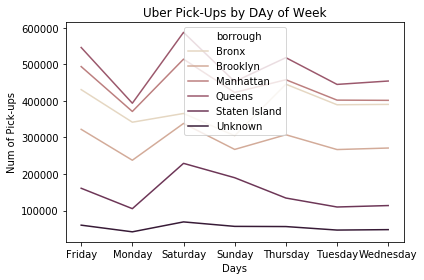

In [40]:
import seaborn as sns
%matplotlib inline
import matplotlib.pylab as plt
ax = (sns
      .lineplot(x="weekday", 
               y = 'cnt',
               hue = 'borrough', 
               palette="ch:.25", 
               data=cnts_weekday))

ax.set(title='Uber Pick-Ups by DAy of Week',
       xlabel='Days', 
       ylabel='Num of Pick-ups')
plt.tight_layout()
plt.show()

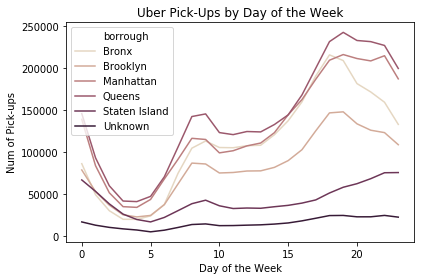

In [31]:
import seaborn as sns
%matplotlib inline
import matplotlib.pylab as plt
ax = (sns
      .lineplot(x="hour", 
               y = 'cnt',
               hue = 'borrough', 
               palette="ch:.25", 
               data=cnts_hour))

ax.set(title='Uber Pick-Ups by Day of the Week',
       xlabel='Day of the Week', 
       ylabel='Num of Pick-ups')
plt.tight_layout()
plt.show()